In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

from algorithms import *
from benchmark import *

# Definition of variables
benchmarkfunction_list = [StybliskiTang, Rastrigin, Rosenbrock, Beale, Sphere, Perm, GoldsteinPrice, Ackley, Bohachevsky] #Hartmann
algorithms_list        = [bayesian_optimization, bfgs, latin_hypercube, nelder_mead, particle_swarm, response_surface, sobol]

### The benchmark functions

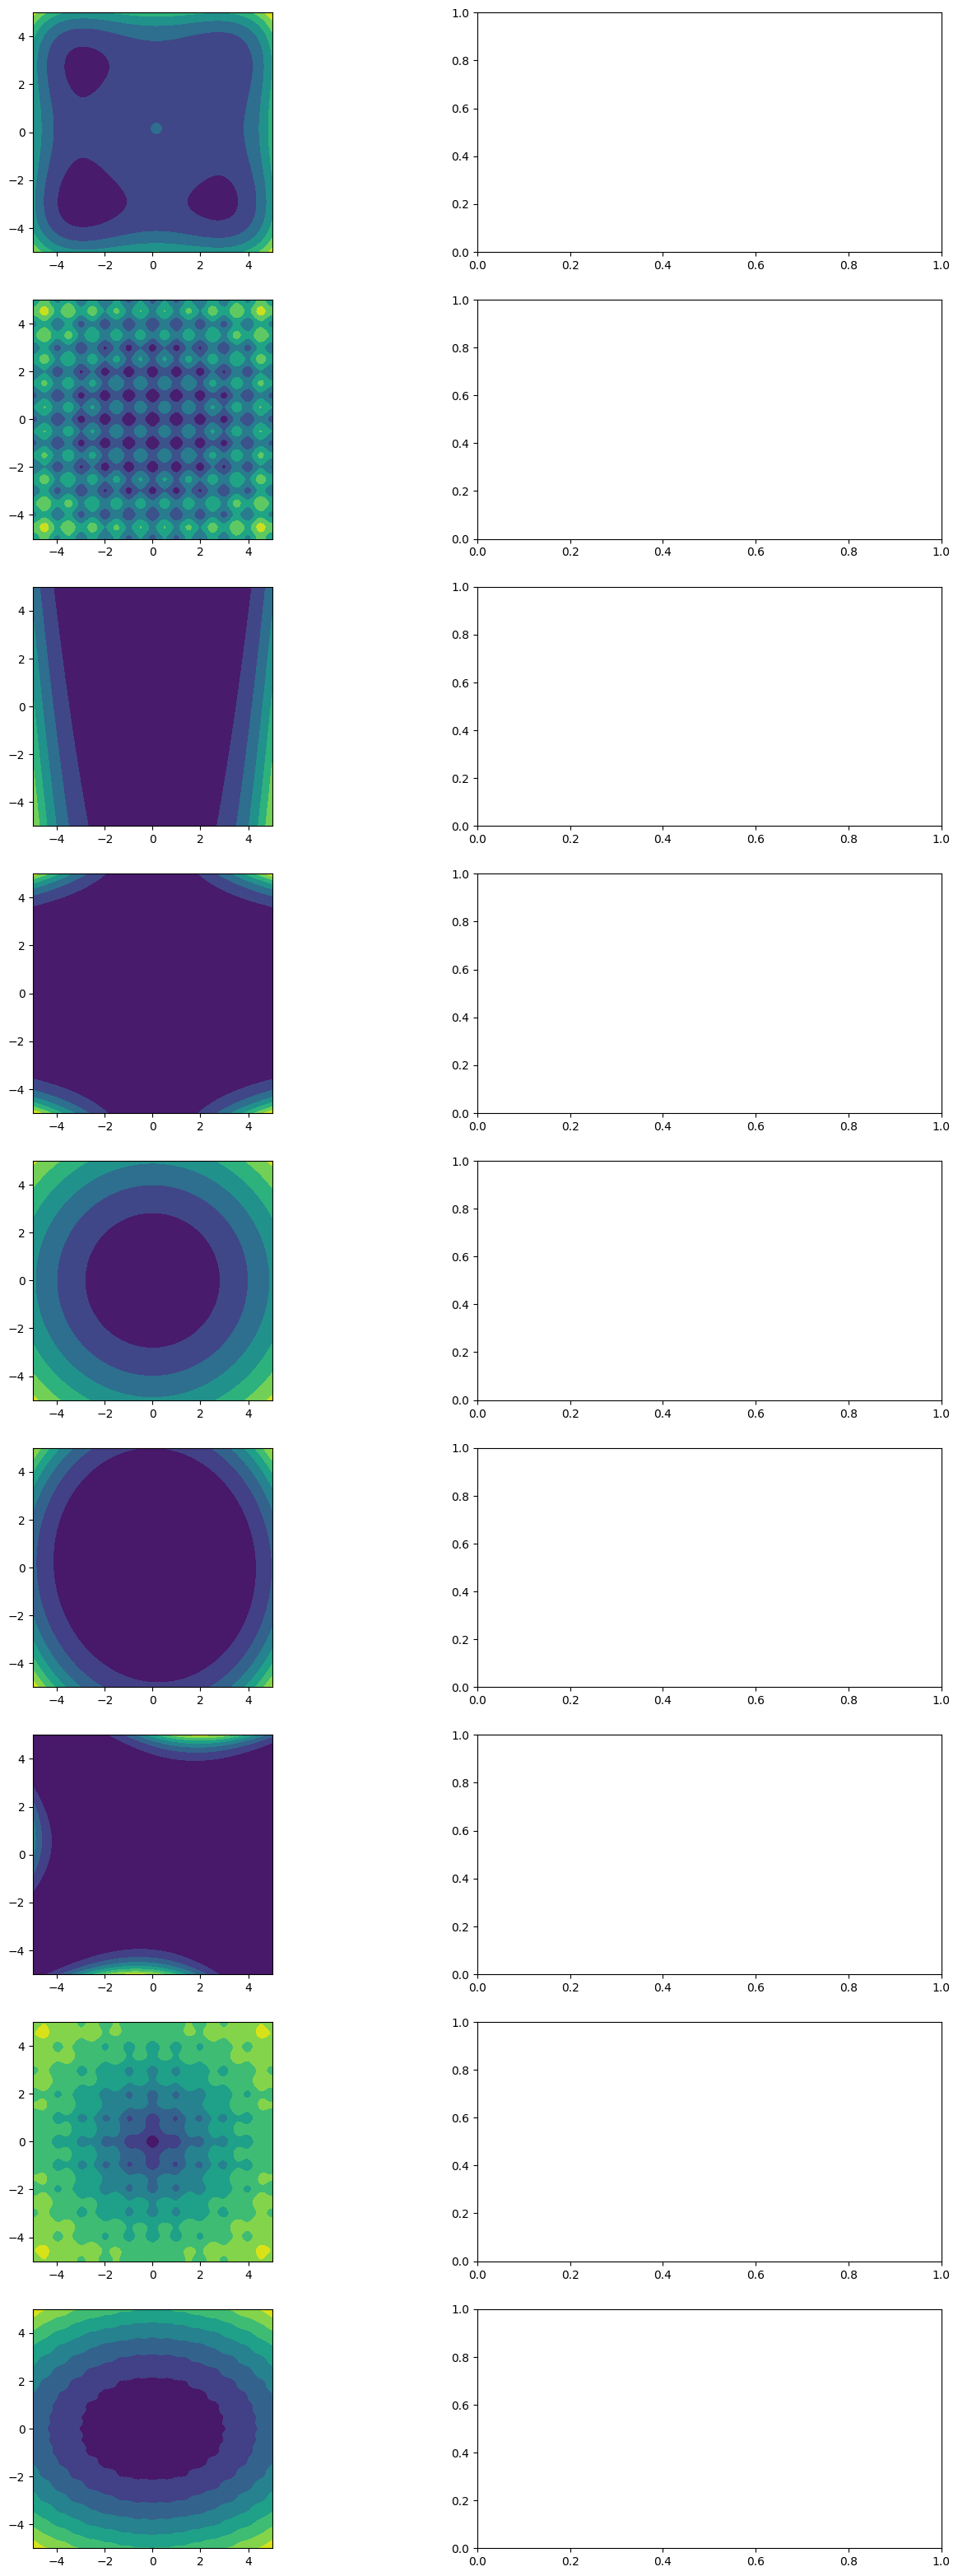

In [5]:
# Define the X1 and X2 span
X1 = np.linspace(-5, 5, 101)
X2 = np.linspace(-5, 5, 101)
points = np.array([[x1,x2] for x1 in X1 for x2 in X2]).T

fig, ax = plt.subplots(len(benchmarkfunction_list), 2, figsize=(16,40))

for idx, fun in enumerate(benchmarkfunction_list):
    # Compute the function
    Fx = fun(points).reshape(101,101).T

    ax[idx,0].contourf(X1,X2,Fx)
    ax[idx,0].axis('scaled')

plt.show()

### Bayesian Optimization performances

|Index|Function            |Tests     |Error Mean               |Error std                |
-------------------------------------------------------------------------------------
|1    |StybliskiTang       |250       |0.01997002529717573      |0.0014166777233145112    |
|2    |Rastrigin           |250       |-0.0033249164796167797   |0.0029773975169875644    |
|3    |Rosenbrock          |250       |0.003157172192512305     |0.0007848401216930432    |
|4    |Beale               |250       |0.004316490078321569     |0.0007177745700565067    |
|5    |Sphere              |250       |0.0003917571466605746    |0.001042183434397186     |
|6    |Perm                |250       |0.003893154470114876     |0.0008152579657970735    |
|7    |GoldsteinPrice      |250       |0.0009733201042768844    |0.0007518247426598913    |
|8    |Ackley              |250       |-0.005150613681289905    |0.005949988395810245     |
|9    |Bohachevsky         |250       |0.0009501070537694157    |0.0010518385907756958

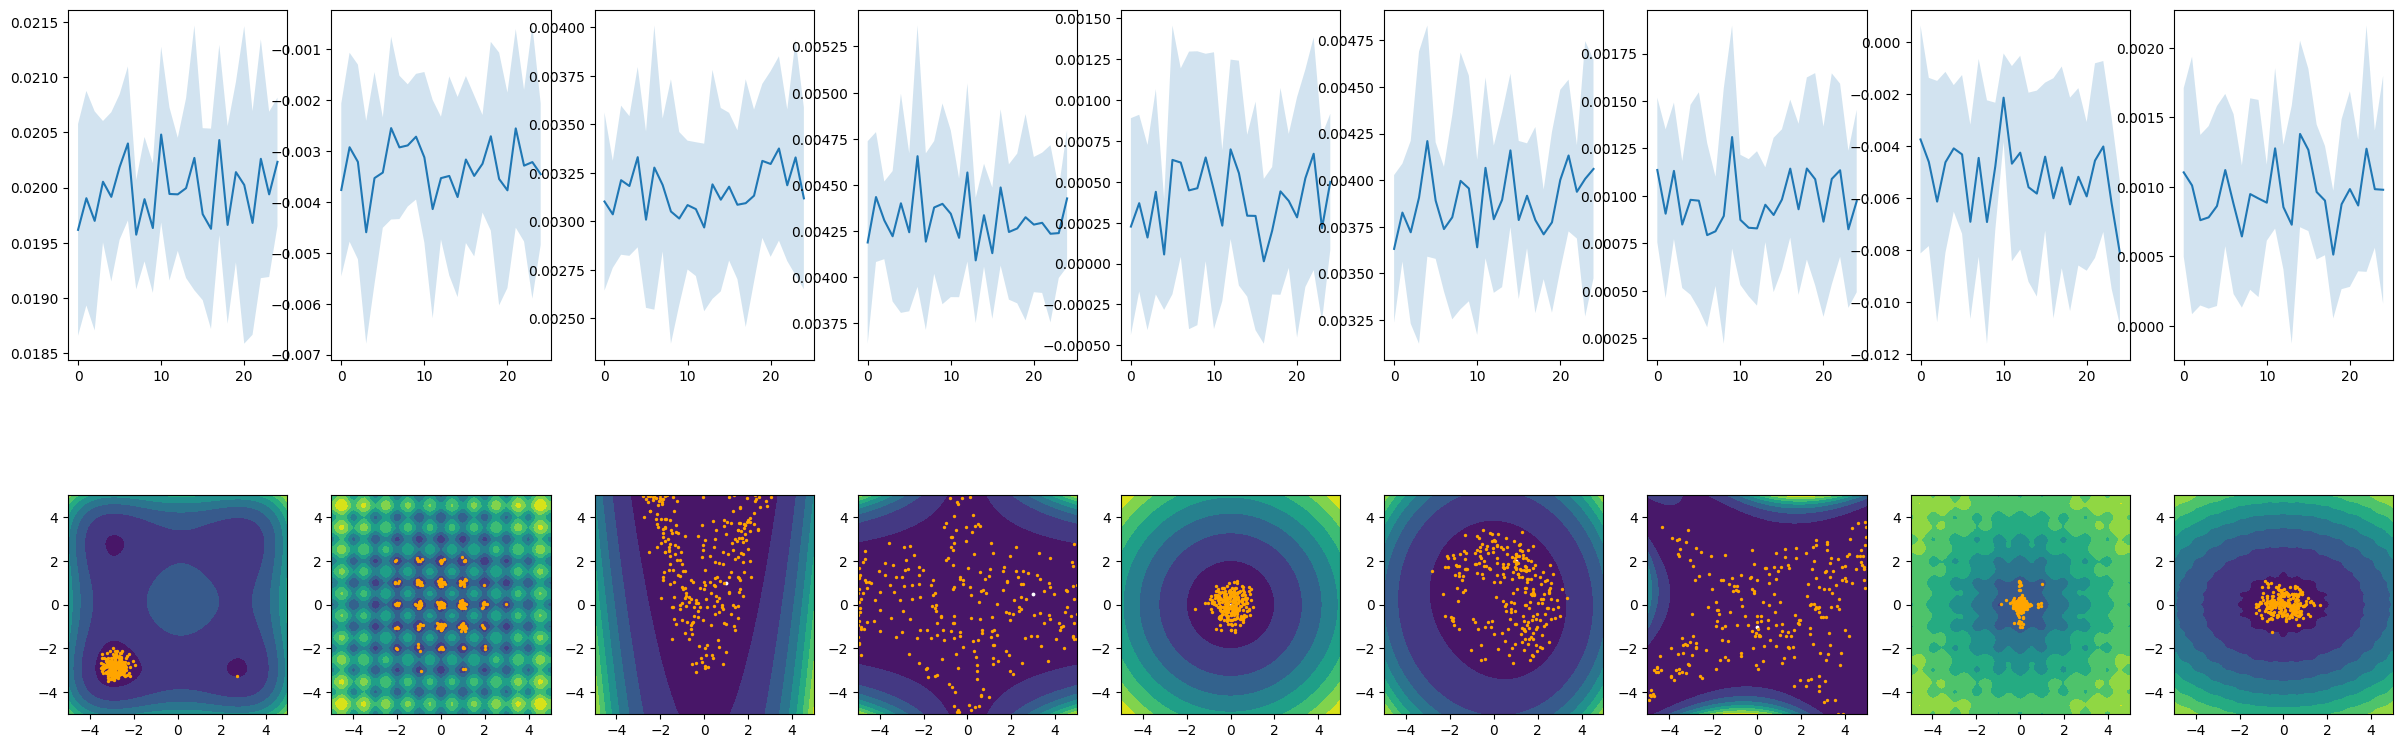

In [4]:
# Define the X1 and X2 span
X1 = X2 = np.linspace(-5, 5, 101)
points = np.array([[x1,x2] for x1 in X1 for x2 in X2])

# Define the parameters for the algorithms
budget    = 100
n_samples = 15
dimension = 2
new_max = 0.28
new_min = 0.22

test_rounds = 25
batch_size = 10
fig, ax = plt.subplots(2,  len(benchmarkfunction_list), figsize=(30,10))

data = [["Index","Function", "Tests", "Error Mean", "Error std"]]

for plt_idx, test_function in enumerate(benchmarkfunction_list):
    # Compute the function
    Fx = test_function(points.T)

    # Find minimum and its coordinates
    idx  = np.argmin(Fx)
    Xmin = points[idx]
    Fmin = Fx[idx]
    Fmax = np.max(Fx)
    test_function_scaled = lambda x: (new_max - new_min)*(test_function(x) - Fmin)/(Fmax - Fmin) + new_min + np.random.normal(0, 0.001)
    Fx_scaled = test_function_scaled(points.T)
    Fmin = Fx_scaled[idx]
    ax[1, plt_idx].contourf(X1,X2,Fx_scaled.reshape(101,101).T)
    ax[1, plt_idx].axis('scaled')
    ax[1, plt_idx].scatter(Xmin[0], Xmin[1], c="white",s=3)      # Real minimum

    
    test_mean, test_std = [], []
    for _ in range(test_rounds):
        batch = []
        for _ in range(batch_size):
            # Define the intial set of points
            initial_x =  np.random.uniform(low=-5, high=5, size=[dimension, n_samples])
            
            # Estimate the minimum
            X_best, Y_best, _, _ = bayesian_optimization(test_function_scaled, X=initial_x, dimension=dimension, n_samples=n_samples, sampling_budget=budget, low=-5, high=5)
            batch.append(Y_best)
            ax[1, plt_idx].scatter(X_best[0], X_best[1], c="orange",s=2) 
        
        batch_mean = np.mean(Fmin - batch)
        batch_std  = np.std(Fmin - batch)

        test_mean.append(batch_mean)
        test_std.append(batch_std)
    test_mean = np.array(test_mean)
    test_std = np.array(test_std)
    data.append([test_function.__name__, test_rounds*batch_size, np.mean(test_mean).copy(), np.sqrt(np.sum(test_std**2) / (batch_size-1))])

    
    ax[0, plt_idx].plot(np.arange(0,len(test_mean)), test_mean, label='Computed minima')
    ax[0, plt_idx].fill_between(np.arange(0,len(test_mean)), test_mean - test_std, test_mean + test_std, alpha=0.2, label='Standard Deviation')

for i, row in enumerate(data):
    if (i==0): print(f"|{row[0]:<5}|{row[1]:<20}|{row[2]:<10}|{row[3]:<25}|{row[4]:<25}|")
    else:
        if (i == 1): print(f"{'-' * 85}")
        print(f"|{i:<5}|{row[0]:<20}|{row[1]:<10}|{row[2]:<25}|{row[3]:<25}|")



### Latin Hypercube performances

|Index|Function            |Tests     |Error Mean               |Error std                |
-------------------------------------------------------------------------------------
|1    |StybliskiTang       |250       |0.01775462183561283      |0.002250183514690185     |
|2    |Rastrigin           |250       |-0.0044673259048373815   |0.003355438986878624     |
|3    |Rosenbrock          |250       |0.0005390439456761549    |0.0014938042479461426    |
|4    |Beale               |250       |-0.0006701210694133221   |0.0015046039513034746    |
|5    |Sphere              |250       |0.0007611302389489131    |0.001632649485633444     |
|6    |Perm                |250       |-0.000546146187426265    |0.001619131954753518     |
|7    |GoldsteinPrice      |250       |-0.00130621594016953     |0.0014890634040457815    |
|8    |Ackley              |250       |-0.009361166796717321    |0.0066791956905397       |
|9    |Bohachevsky         |250       |-0.0018390859348135485   |0.0017318395207139227

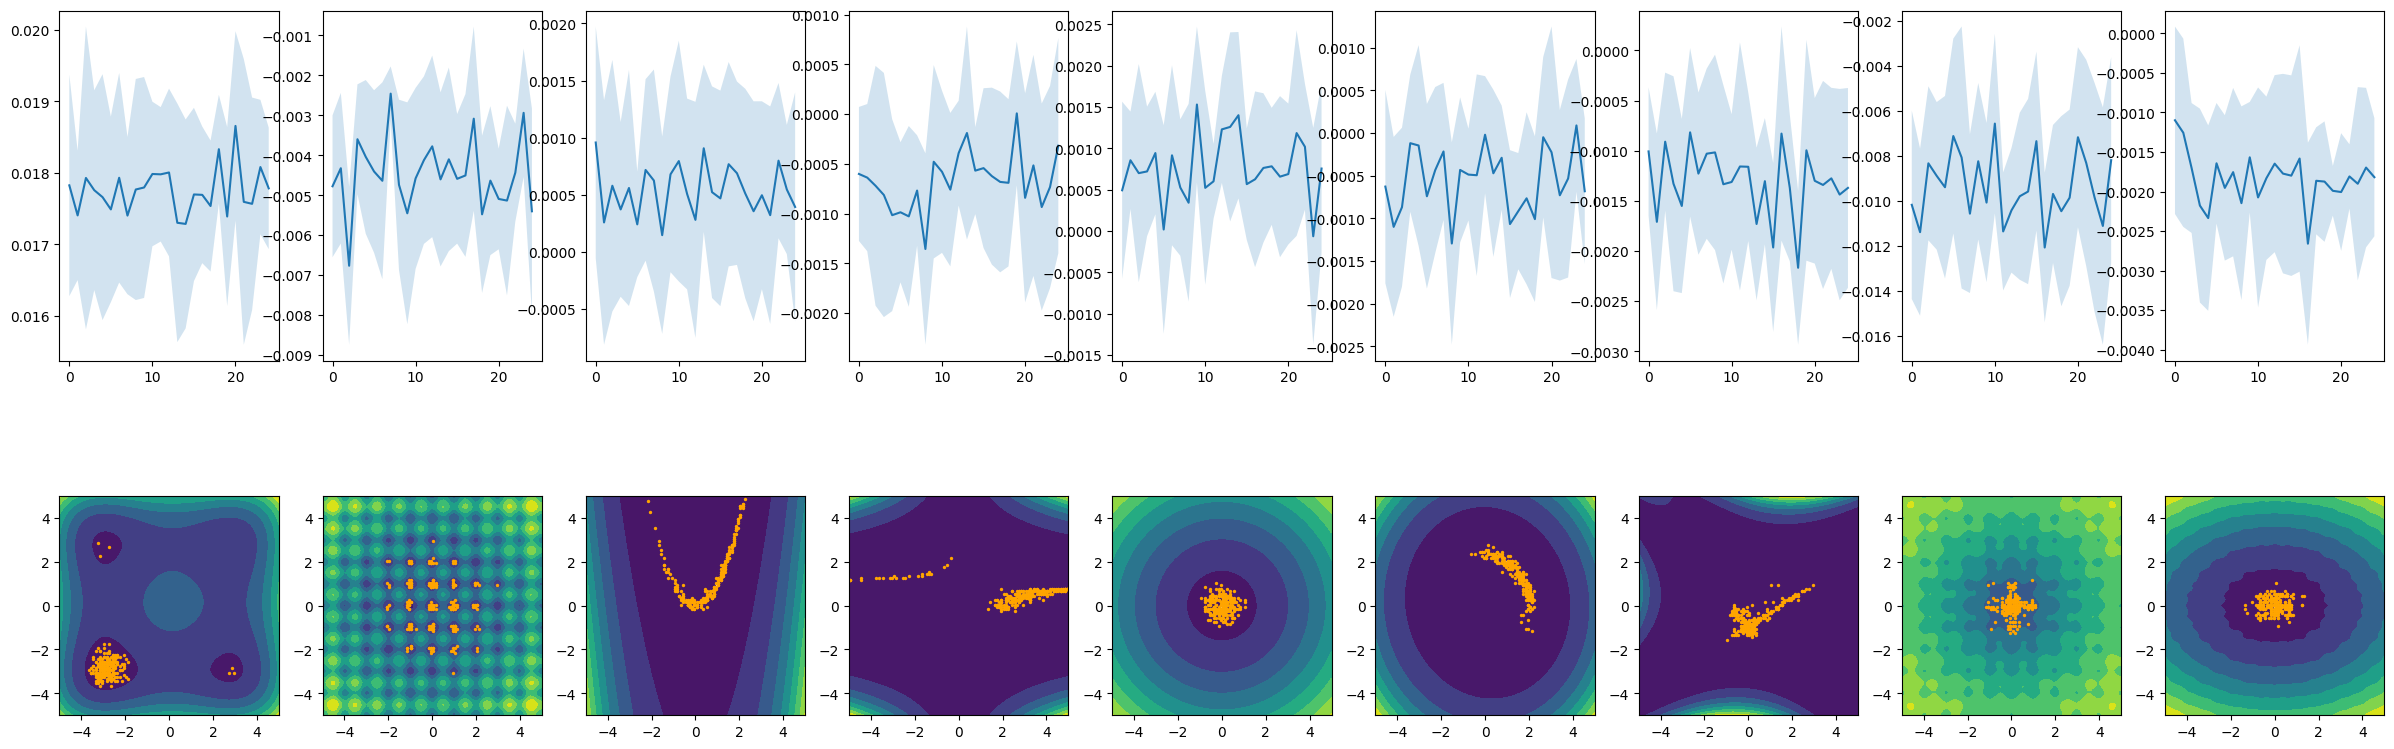

In [7]:
# Define the X1 and X2 span
X1 = X2 = np.linspace(-5, 5, 101)
points = np.array([[x1,x2] for x1 in X1 for x2 in X2])

# Define the parameters for the algorithms
budget    = 100
n_samples = 15
dimension = 2
new_max = 0.28
new_min = 0.22

test_rounds = 25
batch_size = 10
fig, ax = plt.subplots(2,  len(benchmarkfunction_list), figsize=(30,10))

data = [["Index","Function", "Tests", "Error Mean", "Error std"]]

for plt_idx, test_function in enumerate(benchmarkfunction_list):
    # Compute the function
    Fx = test_function(points.T)

    # Find minimum and its coordinates
    idx  = np.argmin(Fx)
    Xmin = points[idx]
    Fmin = Fx[idx]
    Fmax = np.max(Fx)
    test_function_scaled = lambda x: (new_max - new_min)*(test_function(x) - Fmin)/(Fmax - Fmin) + new_min + np.random.normal(0, 0.001)
    Fx_scaled = test_function_scaled(points.T)
    Fmin = Fx_scaled[idx]
    ax[1, plt_idx].contourf(X1,X2,Fx_scaled.reshape(101,101).T)
    ax[1, plt_idx].axis('scaled')
    ax[1, plt_idx].scatter(Xmin[0], Xmin[1], c="white",s=3)      # Real minimum

    
    test_mean, test_std = [], []
    for _ in range(test_rounds):
        batch = []
        for _ in range(batch_size):
            # Define the intial set of points
            initial_x =  np.random.uniform(low=-5, high=5, size=[dimension, n_samples])
            
            # Estimate the minimum
            X_best, Y_best, _, _ = latin_hypercube(test_function_scaled, n_samples=budget , dimension=dimension, lower_bounds= [-5, -5], upper_bounds=[5, 5])
            batch.append(Y_best)
            ax[1, plt_idx].scatter(X_best[0], X_best[1], c="orange",s=2) 
        
        batch_mean = np.mean(Fmin - batch)
        batch_std  = np.std(Fmin - batch)

        test_mean.append(batch_mean)
        test_std.append(batch_std)
    test_mean = np.array(test_mean)
    test_std = np.array(test_std)
    data.append([test_function.__name__, test_rounds*batch_size, np.mean(test_mean).copy(), np.sqrt(np.sum(test_std**2) / (batch_size-1))])

    
    ax[0, plt_idx].plot(np.arange(0,len(test_mean)), test_mean, label='Computed minima')
    ax[0, plt_idx].fill_between(np.arange(0,len(test_mean)), test_mean - test_std, test_mean + test_std, alpha=0.2, label='Standard Deviation')

for i, row in enumerate(data):
    if (i==0): print(f"|{row[0]:<5}|{row[1]:<20}|{row[2]:<10}|{row[3]:<25}|{row[4]:<25}|")
    else:
        if (i == 1): print(f"{'-' * 85}")
        print(f"|{i:<5}|{row[0]:<20}|{row[1]:<10}|{row[2]:<25}|{row[3]:<25}|")



### Nelder Mead performances

|Index|Function            |Tests     |Error Mean               |Error std                |
-------------------------------------------------------------------------------------
|1    |StybliskiTang       |250       |0.014635503177893692     |0.00637952270774217      |
|2    |Rastrigin           |250       |-0.010800820064108199    |0.014092280346855253     |
|3    |Rosenbrock          |250       |-0.000934022067675761    |0.005758408365448683     |
|4    |Beale               |250       |0.0017354908723722646    |0.002420251139437307     |
|5    |Sphere              |250       |-0.005449555152806589    |0.01614181185247257      |
|6    |Perm                |250       |-0.0013759647974072792   |0.005286544484543444     |
|7    |GoldsteinPrice      |250       |0.000656263455854802     |0.0019006965579200256    |
|8    |Ackley              |250       |-0.027880705667377045    |0.022297450904464906     |
|9    |Bohachevsky         |250       |-0.004751305400435148    |0.013066056710961773 

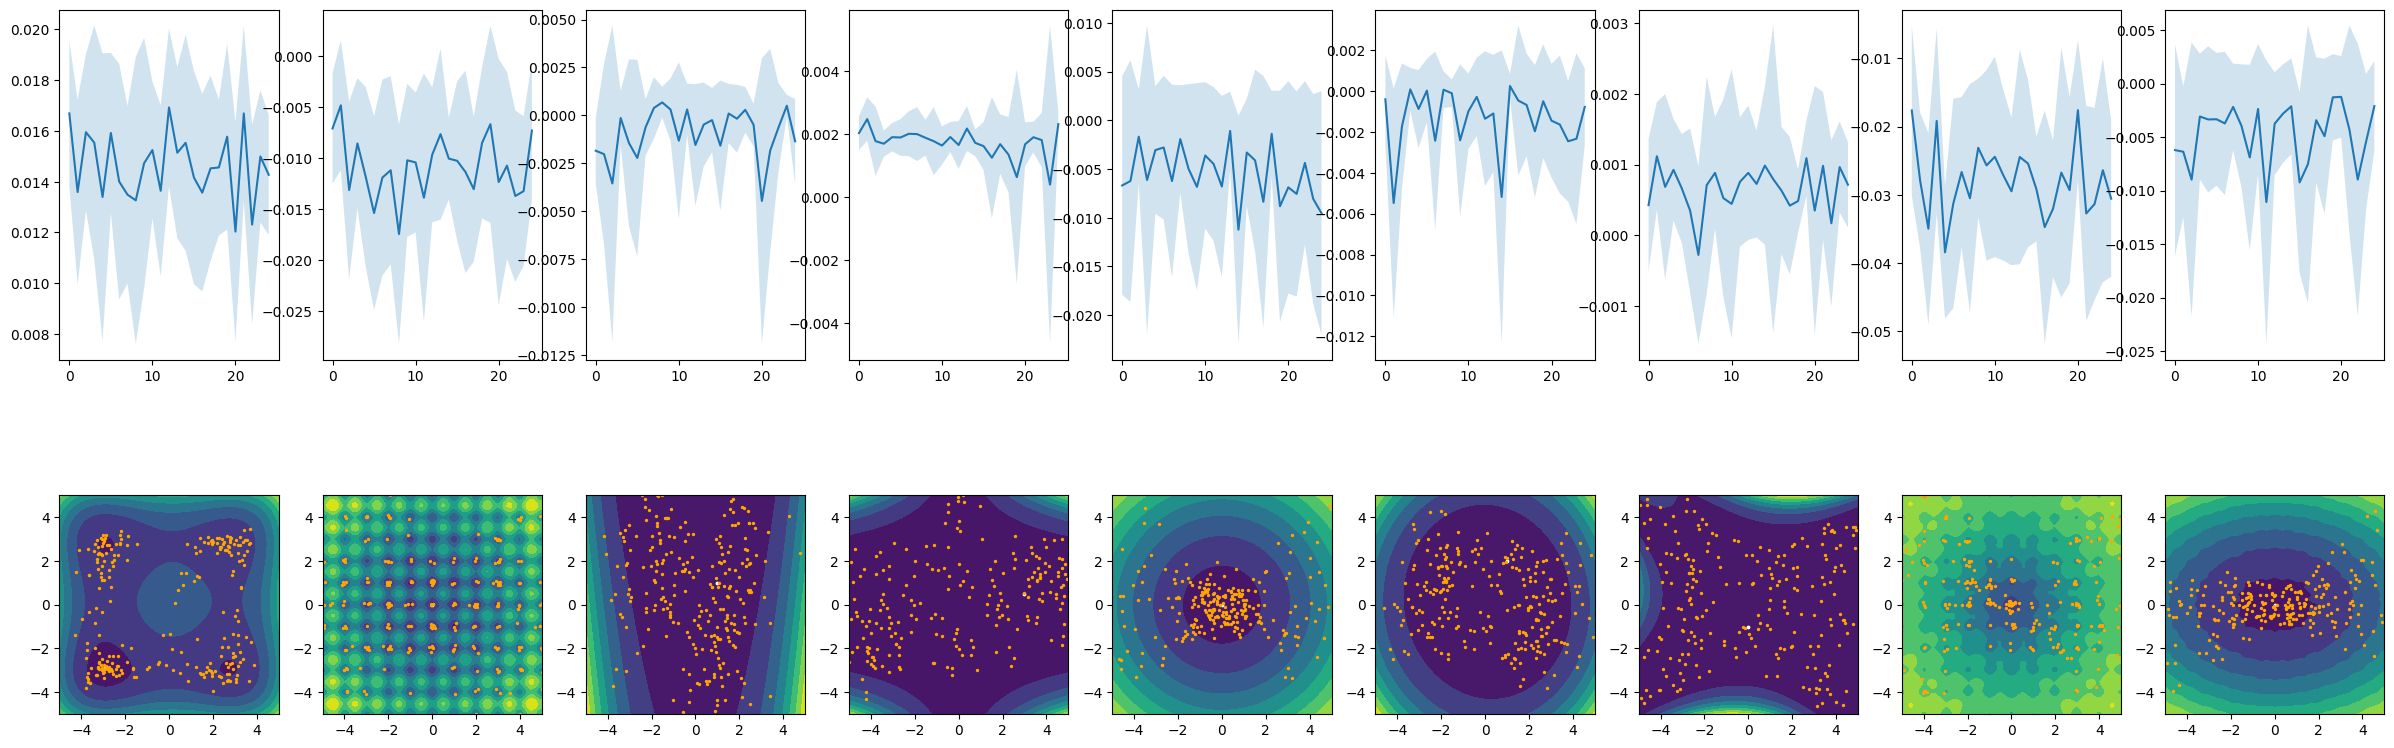

In [8]:
# Define the X1 and X2 span
X1 = X2 = np.linspace(-5, 5, 101)
points = np.array([[x1,x2] for x1 in X1 for x2 in X2])

# Define the parameters for the algorithms
budget    = 100
n_samples = 15
dimension = 2
new_max = 0.28
new_min = 0.22

test_rounds = 25
batch_size = 10
fig, ax = plt.subplots(2,  len(benchmarkfunction_list), figsize=(30,10))

data = [["Index","Function", "Tests", "Error Mean", "Error std"]]

for plt_idx, test_function in enumerate(benchmarkfunction_list):
    # Compute the function
    Fx = test_function(points.T)

    # Find minimum and its coordinates
    idx  = np.argmin(Fx)
    Xmin = points[idx]
    Fmin = Fx[idx]
    Fmax = np.max(Fx)
    test_function_scaled = lambda x: (new_max - new_min)*(test_function(x) - Fmin)/(Fmax - Fmin) + new_min + np.random.normal(0, 0.001)
    Fx_scaled = test_function_scaled(points.T)
    Fmin = Fx_scaled[idx]
    ax[1, plt_idx].contourf(X1,X2,Fx_scaled.reshape(101,101).T)
    ax[1, plt_idx].axis('scaled')
    ax[1, plt_idx].scatter(Xmin[0], Xmin[1], c="white",s=3)      # Real minimum

    
    test_mean, test_std = [], []
    for _ in range(test_rounds):
        batch = []
        for _ in range(batch_size):
            # Define the intial set of points
            initial_x =  np.random.uniform(low=-5, high=5, size=[dimension, n_samples])
            
            # Estimate the minimum
            X_best, Y_best, _, _ = nelder_mead(test_function_scaled, x0 = initial_x[:,0], low=-5, high=5, step=0.1, no_improve_thr=10e-6, no_improv_break=10, sampling_budget=budget, alpha=1., gamma=2., rho=-0.5, sigma=0.5)
            batch.append(Y_best)
            ax[1, plt_idx].scatter(X_best[0], X_best[1], c="orange",s=2) 
        
        batch_mean = np.mean(Fmin - batch)
        batch_std  = np.std(Fmin - batch)

        test_mean.append(batch_mean)
        test_std.append(batch_std)
    test_mean = np.array(test_mean)
    test_std = np.array(test_std)
    data.append([test_function.__name__, test_rounds*batch_size, np.mean(test_mean).copy(), np.sqrt(np.sum(test_std**2) / (batch_size-1))])

    
    ax[0, plt_idx].plot(np.arange(0,len(test_mean)), test_mean, label='Computed minima')
    ax[0, plt_idx].fill_between(np.arange(0,len(test_mean)), test_mean - test_std, test_mean + test_std, alpha=0.2, label='Standard Deviation')

for i, row in enumerate(data):
    if (i==0): print(f"|{row[0]:<5}|{row[1]:<20}|{row[2]:<10}|{row[3]:<25}|{row[4]:<25}|")
    else:
        if (i == 1): print(f"{'-' * 85}")
        print(f"|{i:<5}|{row[0]:<20}|{row[1]:<10}|{row[2]:<25}|{row[3]:<25}|")



### Particle Swarm performances

|Index|Function            |Tests     |Error Mean               |Error std                |
-------------------------------------------------------------------------------------
|1    |StybliskiTang       |250       |0.01588405336498243      |0.0028140156783751195    |
|2    |Rastrigin           |250       |-0.0026010059027704495   |0.002867292180929328     |
|3    |Rosenbrock          |250       |0.001075825045109982     |0.0010538264006098343    |
|4    |Beale               |250       |0.002314114688156953     |0.0009997832464758813    |
|5    |Sphere              |250       |-0.0019725997655331983   |0.002087064553067635     |
|6    |Perm                |250       |0.0024937593284680777    |0.0010576672779120896    |
|7    |GoldsteinPrice      |250       |0.0017783335229875914    |0.0010600318096925933    |
|8    |Ackley              |250       |-0.012176529930605931    |0.00841910450044451      |
|9    |Bohachevsky         |250       |-0.0006160516361170611   |0.002034029476498329 

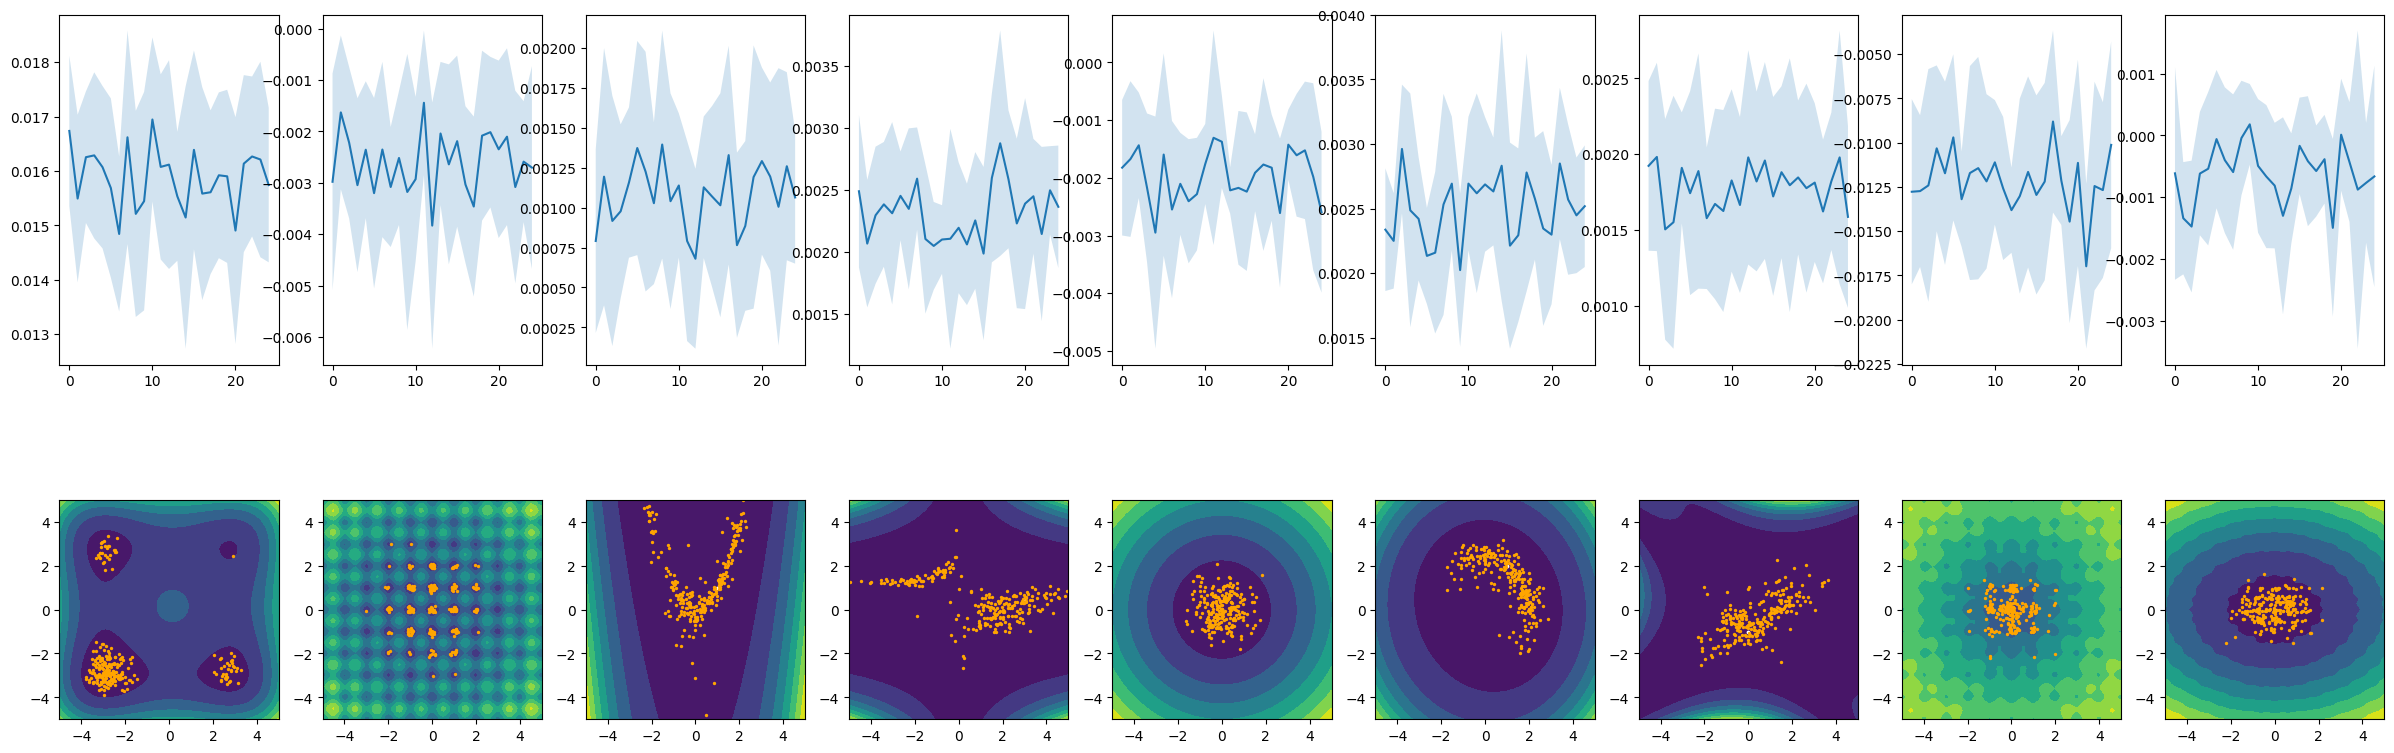

In [9]:
# Define the X1 and X2 span
X1 = X2 = np.linspace(-5, 5, 101)
points = np.array([[x1,x2] for x1 in X1 for x2 in X2])

# Define the parameters for the algorithms
budget    = 100
n_samples = 15
dimension = 2
new_max = 0.28
new_min = 0.22

test_rounds = 25
batch_size = 10
fig, ax = plt.subplots(2,  len(benchmarkfunction_list), figsize=(30,10))

data = [["Index","Function", "Tests", "Error Mean", "Error std"]]

for plt_idx, test_function in enumerate(benchmarkfunction_list):
    # Compute the function
    Fx = test_function(points.T)

    # Find minimum and its coordinates
    idx  = np.argmin(Fx)
    Xmin = points[idx]
    Fmin = Fx[idx]
    Fmax = np.max(Fx)
    test_function_scaled = lambda x: (new_max - new_min)*(test_function(x) - Fmin)/(Fmax - Fmin) + new_min + np.random.normal(0, 0.001)
    Fx_scaled = test_function_scaled(points.T)
    Fmin = Fx_scaled[idx]
    ax[1, plt_idx].contourf(X1,X2,Fx_scaled.reshape(101,101).T)
    ax[1, plt_idx].axis('scaled')
    ax[1, plt_idx].scatter(Xmin[0], Xmin[1], c="white",s=3)      # Real minimum

    
    test_mean, test_std = [], []
    for _ in range(test_rounds):
        batch = []
        for _ in range(batch_size):
            # Define the intial set of points
            initial_x =  np.random.uniform(low=-5, high=5, size=[dimension, n_samples])
            
            # Estimate the minimum
            X_best, Y_best, _, _ = particle_swarm(test_function_scaled, X=initial_x, V=None, dimension=dimension, low=-5, high=5, sampling_budget=budget, n_particles=n_samples, tol=10e-6, c1=0.1, c2=0.1, w=0.8)
            batch.append(Y_best)
            ax[1, plt_idx].scatter(X_best[0], X_best[1], c="orange",s=2) 
        
        batch_mean = np.mean(Fmin - batch)
        batch_std  = np.std(Fmin - batch)

        test_mean.append(batch_mean)
        test_std.append(batch_std)
    test_mean = np.array(test_mean)
    test_std = np.array(test_std)
    data.append([test_function.__name__, test_rounds*batch_size, np.mean(test_mean).copy(), np.sqrt(np.sum(test_std**2) / (batch_size-1))])

    
    ax[0, plt_idx].plot(np.arange(0,len(test_mean)), test_mean, label='Computed minima')
    ax[0, plt_idx].fill_between(np.arange(0,len(test_mean)), test_mean - test_std, test_mean + test_std, alpha=0.2, label='Standard Deviation')

for i, row in enumerate(data):
    if (i==0): print(f"|{row[0]:<5}|{row[1]:<20}|{row[2]:<10}|{row[3]:<25}|{row[4]:<25}|")
    else:
        if (i == 1): print(f"{'-' * 85}")
        print(f"|{i:<5}|{row[0]:<20}|{row[1]:<10}|{row[2]:<25}|{row[3]:<25}|")



### Sobol performances

|Index|Function            |Tests     |Error Mean               |Error std                |
-------------------------------------------------------------------------------------
|1    |StybliskiTang       |250       |0.01896435819686216      |0.0016161532371780092    |
|2    |Rastrigin           |250       |0.0007608264110132618    |0.001548812112338971     |
|3    |Rosenbrock          |250       |-0.0020105674066318714   |0.001602354343911304     |
|4    |Beale               |250       |-0.00011781588634565943  |0.0016181325357270053    |
|5    |Sphere              |250       |0.0003331813614152741    |0.0016059249593704643    |
|6    |Perm                |250       |-0.0006079225407683005   |0.0016399113116564352    |
|7    |GoldsteinPrice      |250       |0.00015220110008603882   |0.001606076193516632     |
|8    |Ackley              |250       |5.382131745240913e-05    |0.0015924377077374942    |
|9    |Bohachevsky         |250       |-0.000979564694600011    |0.00158845821241555  

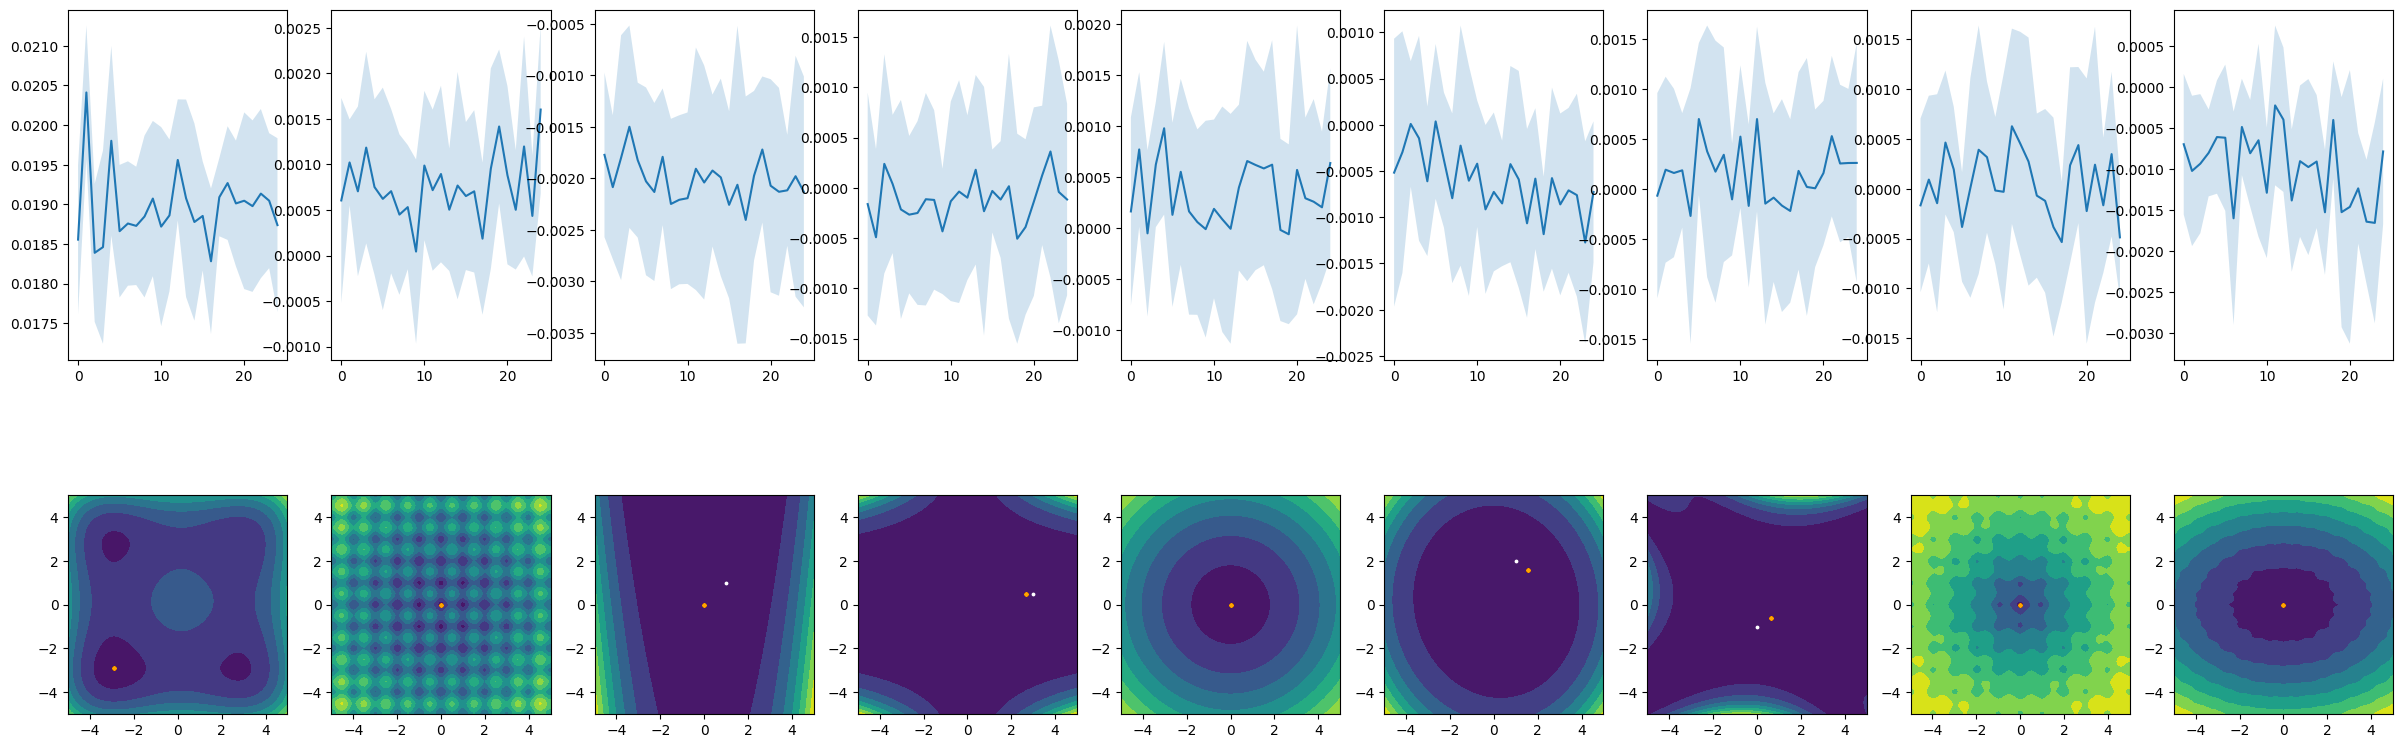

In [10]:
# Define the X1 and X2 span
X1 = X2 = np.linspace(-5, 5, 101)
points = np.array([[x1,x2] for x1 in X1 for x2 in X2])

# Define the parameters for the algorithms
budget    = 100
n_samples = 15
dimension = 2
new_max = 0.28
new_min = 0.22

test_rounds = 25
batch_size = 10
fig, ax = plt.subplots(2,  len(benchmarkfunction_list), figsize=(30,10))

data = [["Index","Function", "Tests", "Error Mean", "Error std"]]

for plt_idx, test_function in enumerate(benchmarkfunction_list):
    # Compute the function
    Fx = test_function(points.T)

    # Find minimum and its coordinates
    idx  = np.argmin(Fx)
    Xmin = points[idx]
    Fmin = Fx[idx]
    Fmax = np.max(Fx)
    test_function_scaled = lambda x: (new_max - new_min)*(test_function(x) - Fmin)/(Fmax - Fmin) + new_min + np.random.normal(0, 0.001)
    Fx_scaled = test_function_scaled(points.T)
    Fmin = Fx_scaled[idx]
    ax[1, plt_idx].contourf(X1,X2,Fx_scaled.reshape(101,101).T)
    ax[1, plt_idx].axis('scaled')
    ax[1, plt_idx].scatter(Xmin[0], Xmin[1], c="white",s=3)      # Real minimum

    
    test_mean, test_std = [], []
    for _ in range(test_rounds):
        batch = []
        for _ in range(batch_size):
            # Define the intial set of points
            initial_x =  np.random.uniform(low=-5, high=5, size=[dimension, n_samples])
            
            # Estimate the minimum
            X_best, Y_best, _, _ = sobol(test_function_scaled,  n_samples=budget , dimension=dimension, lower_bounds= [-5, -5], upper_bounds=[5, 5])
            batch.append(Y_best)
            ax[1, plt_idx].scatter(X_best[0], X_best[1], c="orange",s=2) 
        
        batch_mean = np.mean(Fmin - batch)
        batch_std  = np.std(Fmin - batch)

        test_mean.append(batch_mean)
        test_std.append(batch_std)
    test_mean = np.array(test_mean)
    test_std = np.array(test_std)
    data.append([test_function.__name__, test_rounds*batch_size, np.mean(test_mean).copy(), np.sqrt(np.sum(test_std**2) / (batch_size-1))])

    
    ax[0, plt_idx].plot(np.arange(0,len(test_mean)), test_mean, label='Computed minima')
    ax[0, plt_idx].fill_between(np.arange(0,len(test_mean)), test_mean - test_std, test_mean + test_std, alpha=0.2, label='Standard Deviation')

for i, row in enumerate(data):
    if (i==0): print(f"|{row[0]:<5}|{row[1]:<20}|{row[2]:<10}|{row[3]:<25}|{row[4]:<25}|")
    else:
        if (i == 1): print(f"{'-' * 85}")
        print(f"|{i:<5}|{row[0]:<20}|{row[1]:<10}|{row[2]:<25}|{row[3]:<25}|")